<a href="https://colab.research.google.com/github/IshaBhimani18/Examining-Factors-Responsible-for-Heart-Attacks/blob/main/Data_Analyst_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Domain: Healthcare

Cardiovascular diseases(CVD) are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all the information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

1. Preliminary analysis:

  * Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
  * Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

2. Performing EDA:

  * Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools.

  * Study the occurrence of CVD across different ages.

  * Can we detect heart attack based on anomalies in resting blood pressure of the patient?

  * Study the composition of overall patients w.r.t . gender.

  * Describe the relationship between cholesterol levels and our target variable.

  * What can be concluded about the relationship between peak exercising and occurrence of heart attack?

  * Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

  * Use a pair plot to understand the relationship between all the given variables.

3. Build a baseline model to predict using a Logistic Regression and explore the results.

 

In [510]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [511]:
#Import the dataset
df = pd.read_excel('data.xlsx')

#1. Perform Preliminary Data Inspection

In [512]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [513]:
#Number of rows and columns
df.shape

(303, 14)

In [514]:
#Checking for Data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [515]:
#Print data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [516]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [517]:
#Statical summary of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [518]:
#No. of unique values in every variable
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [519]:
#Checking for duplicate values
df.duplicated().sum()

1

In [520]:
df.drop_duplicates(keep=False, inplace=True)

In [521]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#2. Exploratory Data Analysis


###Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools.

In [522]:
# Identifying and changing some column dtypes to categorical 

df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')
df['ca'] = df['ca'].astype('object')

In [523]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

1    163
0    138
Name: target, dtype: int64


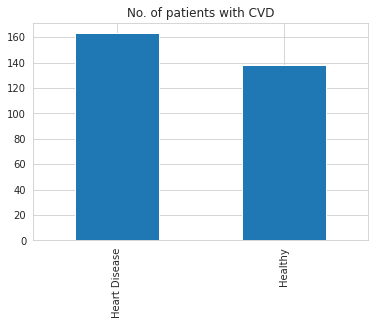

165 patients have had CVD and 138 do not.


In [524]:
#Checking patients who experienced an attack(target variable)
print(df['target'].value_counts())

#Replace values
df['target'].replace({1 : 'Heart Disease', 0:'Healthy'},inplace = True)

df['target'].value_counts().plot(kind = 'bar')
plt.title('No. of patients with CVD')
plt.show()
print('165 patients have had CVD and 138 do not.')

0    143
2     85
1     50
3     23
Name: cp, dtype: int64


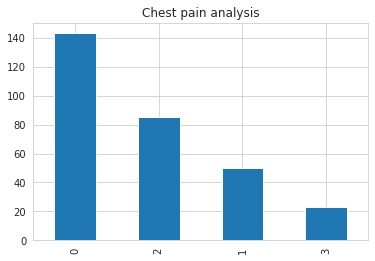

Zero Chest pain type is the majorly found in patients.


In [525]:
#Chest pain analysis
print(df['cp'].value_counts())
df['cp'].value_counts().plot(kind = 'bar')
plt.title('Chest pain analysis')
plt.show()
print('Zero Chest pain type is the majorly found in patients.')

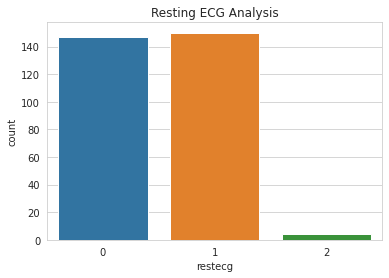

In [526]:
#Resting ecg Analysis
sns.countplot(x = df['restecg'])
plt.title('Resting ECG Analysis')
plt.show()

In [527]:
#Number of major vessels colored by flourosopy (ca) analysis 
print(df['ca'].value_counts())

0    175
1     65
2     38
3     20
4      3
Name: ca, dtype: int64


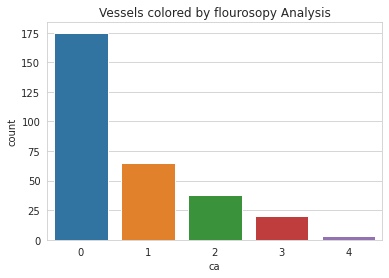

In [528]:
sns.countplot(x = df['ca'])
plt.title('Vessels colored by flourosopy Analysis')
plt.show()

In [529]:
#Thalassaemia analysis
print(df['thal'].value_counts())

2    164
3    117
1     18
0      2
Name: thal, dtype: int64


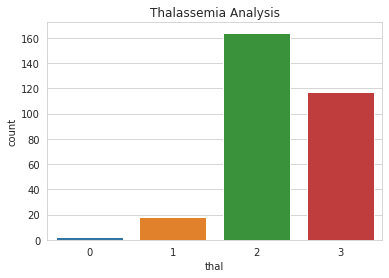

In [530]:
sns.countplot(x = df['thal'])
plt.title('Thalassemia Analysis')
plt.show()

###Study the occurrence of CVD across different ages.

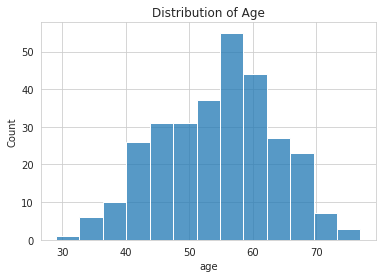

Maximum patients are around the age 60


In [531]:
#Study distribution of age
sns.histplot(x = df['age'])
plt.title('Distribution of Age')
plt.show()
print('Maximum patients are around the age 60')

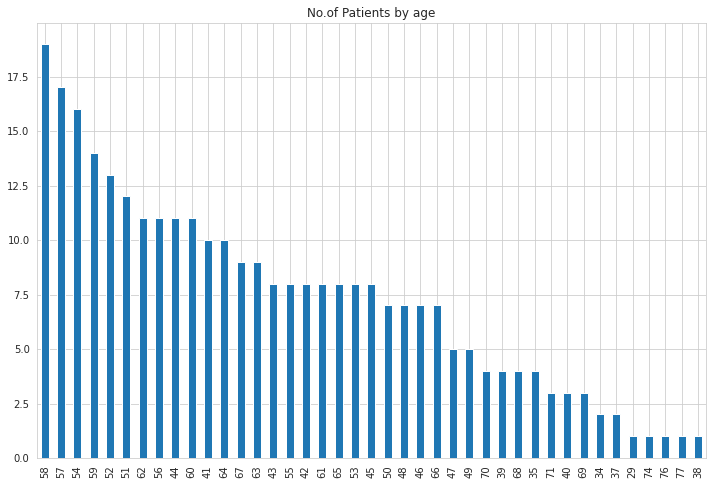

No. of Patients for the age 51  to 59 is the highest.


In [532]:
#No.of Patients by age
plt.figure(figsize = (12,8))
df['age'].value_counts().plot(kind = 'bar')
plt.title('No.of Patients by age')
plt.show()
print('No. of Patients for the age 51  to 59 is the highest.')

In [533]:
#age stats
print('Min age:',min(df['age']))
print('Max age:',max(df['age']))
print('Avg age:',df['age'].mean())

Min age: 29
Max age: 77
Avg age: 54.475083056478404


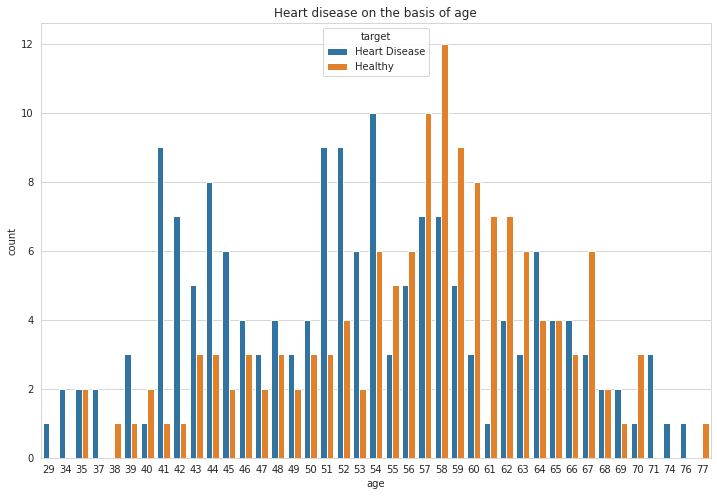

Most of the Heart disease patients' age ranges between 41 to 54.


In [534]:
#Heart disease on the basis of Age
plt.figure(figsize=(12,8))
sns.countplot(df['age'], hue=df['target'])
plt.title('Heart disease on the basis of age')
plt.show()
print("Most of the Heart disease patients' age ranges between 41 to 54.")

###Relationship between CVD and Resting blood pressure

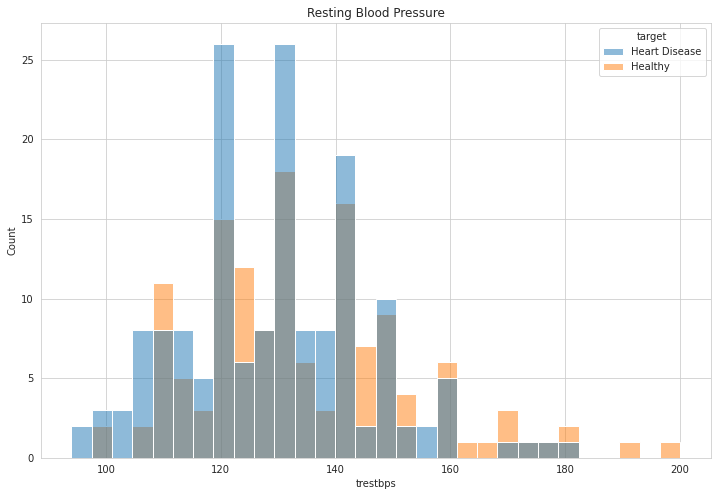

Most of the patients with Heart Disease have resting blood pressure of 120 and 130.
However, there is no distinct relation between Resting blood pressure and patient having CVD.


In [535]:
plt.figure(figsize = (12,8))
sns.histplot(df, x=df['trestbps'], bins=30, hue='target')
plt.title('Resting Blood Pressure')
plt.show()
print('Most of the patients with Heart Disease have resting blood pressure of 120 and 130.')
print('However, there is no distinct relation between Resting blood pressure and patient having CVD.')

###Study the composition of overall patients w.r.t. gender.

1    205
0     96
Name: sex, dtype: int64


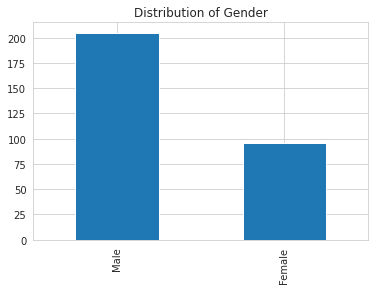

No. of male patients is more than double the no. of female patients.


In [536]:
#distribution of Gender
print(df['sex'].value_counts())

#Replace values
df['sex'].replace({1 : 'Male', 0:'Female'},inplace = True)

df['sex'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Gender')
plt.show()
print('No. of male patients is more than double the no. of female patients.')

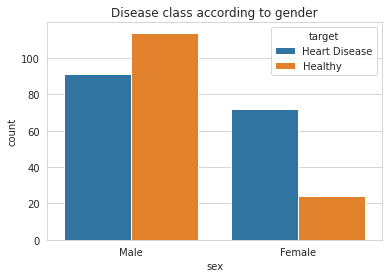

No. of Healthy Males is higher than Males with CVD, but No. of Healthy Females is fairly low than Females with CVD.


In [537]:
#Disease class according to gender
sns.countplot(x = 'sex', hue = 'target', data = df)
plt.title('Disease class according to gender')
plt.show()
print('No. of Healthy Males is higher than Males with CVD, but No. of Healthy Females is fairly low than Females with CVD.')

###Relationship between cholesterol levels and our target variable.

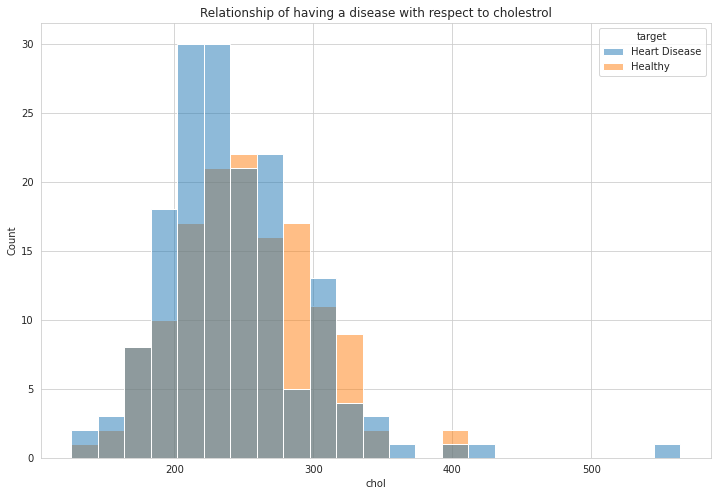

Most of the diseased patients have cholestrol levels ranging from 250 to 300.
The difference between Diseased and Healthy patients is not very significant w.r.t. cholestrol levels.


In [538]:
plt.figure(figsize=(12,8))
sns.histplot(df, x=df['chol'], hue='target')
plt.title('Relationship of having a disease with respect to cholestrol')
plt.show()
print('Most of the diseased patients have cholestrol levels ranging from 250 to 300.')
print('The difference between Diseased and Healthy patients is not very significant w.r.t. cholestrol levels.')

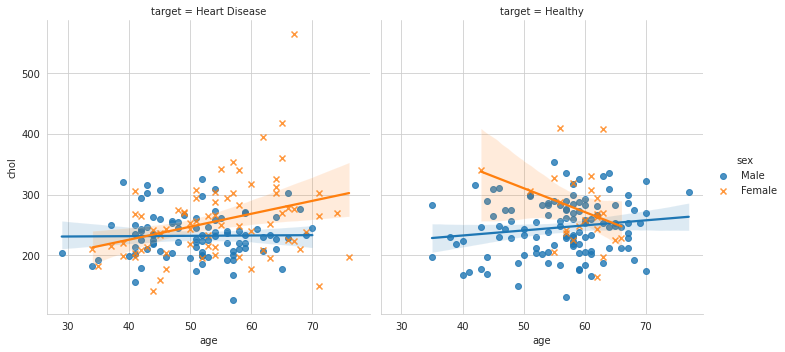

In [539]:
# to understand relationship between age and chol based on gender
sns.lmplot( x = 'age', y = 'chol', hue = 'sex', col = 'target', data = df, markers = ['o','x'])
plt.show()

###Relationship between peak exercising and CVD.

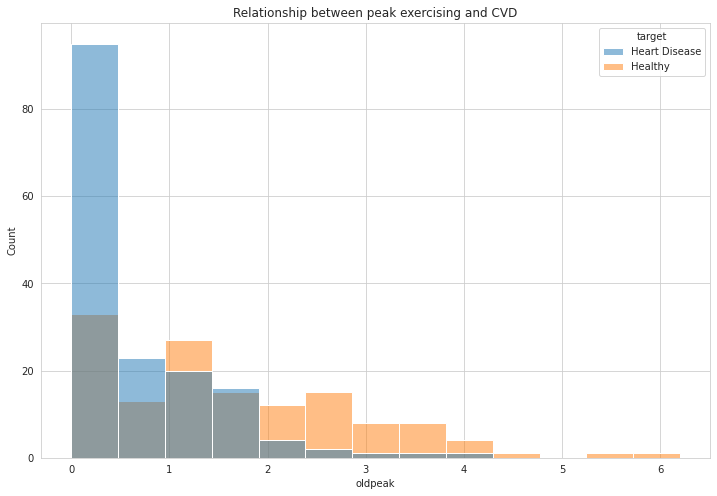

The no. of Healthy decreases with increase in value of peak, the no. of healthy patients drop significantly for values more than 2.


In [540]:
plt.figure(figsize=(12,8))
sns.histplot(df, x=df['oldpeak'], hue='target')
plt.title('Relationship between peak exercising and CVD')
plt.show()
print('The no. of Healthy decreases with increase in value of peak, the no. of healthy patients drop significantly for values more than 2.')

###Is thalassemia a major cause of CVD? 



In [541]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

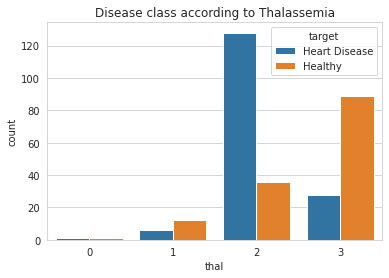

The highest no. of diseased patients experience Type 2 Thalassemia


In [542]:
#Disease class according to Thalassemia
sns.countplot(x = 'thal', hue = 'target', data = df)
plt.title('Disease class according to Thalassemia')
plt.show()
print('The highest no. of diseased patients experience Type 2 Thalassemia')

In [543]:
df['thal'].value_counts()

2    164
3    117
1     18
0      2
Name: thal, dtype: int64

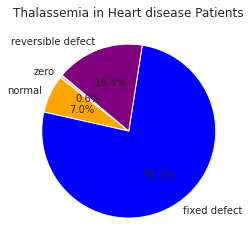

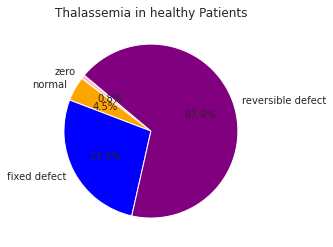

In [544]:
#pie chart to show Thal with heart disease and without it.

labels = ['zero','normal', 'fixed defect','reversible defect']
sizes = [1,12,130,28]
plt.pie(sizes, labels = labels, colors = ['pink','orange','blue', 'purple'], autopct = '%.1f%%',startangle = 140)
plt.title('Thalassemia in Heart disease Patients')
plt.show()

labels = ['zero','normal', 'fixed defect','reversible defect']
sizes = [1,6,36,89]
plt.pie(sizes, labels = labels, colors = ['pink','orange','blue', 'purple'], autopct = '%.1f%%',startangle = 140)
plt.title('Thalassemia in healthy Patients')
plt.show()

###How are the other factors determining the occurrence of CVD?

In [545]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

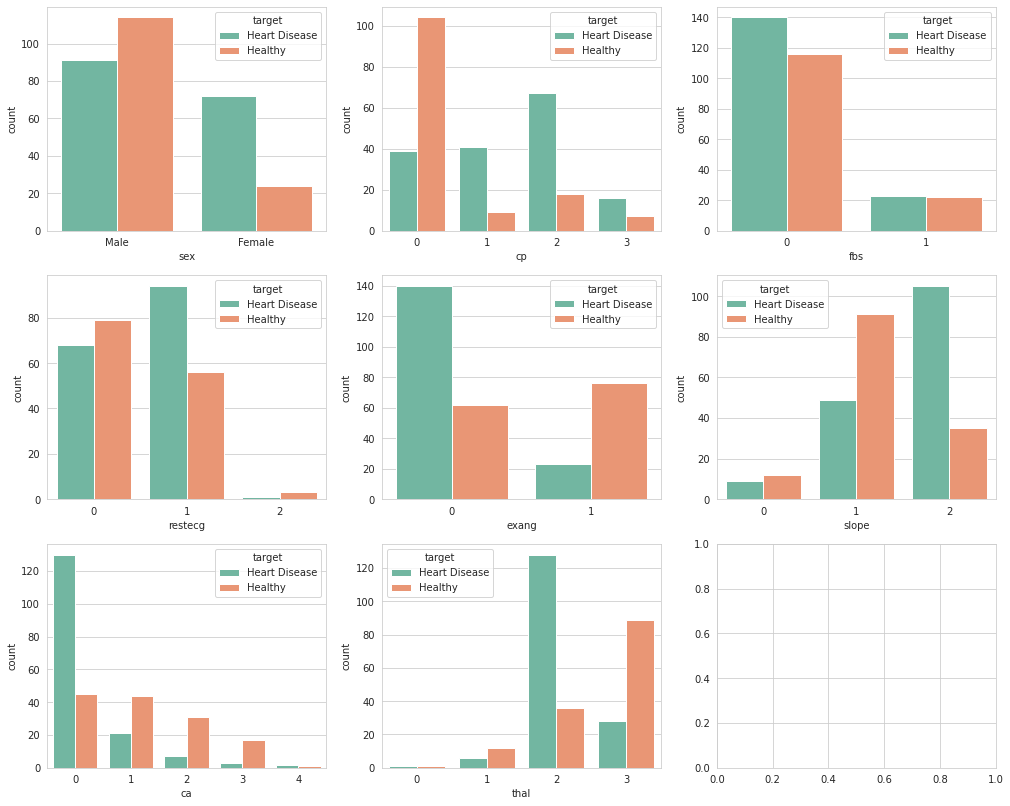

In [546]:
#Understanding relations between Categorical data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,14))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set2')

In [547]:
#Relation between numerical variables
df_num = df.select_dtypes(exclude = 'object')
df_num.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [548]:
col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

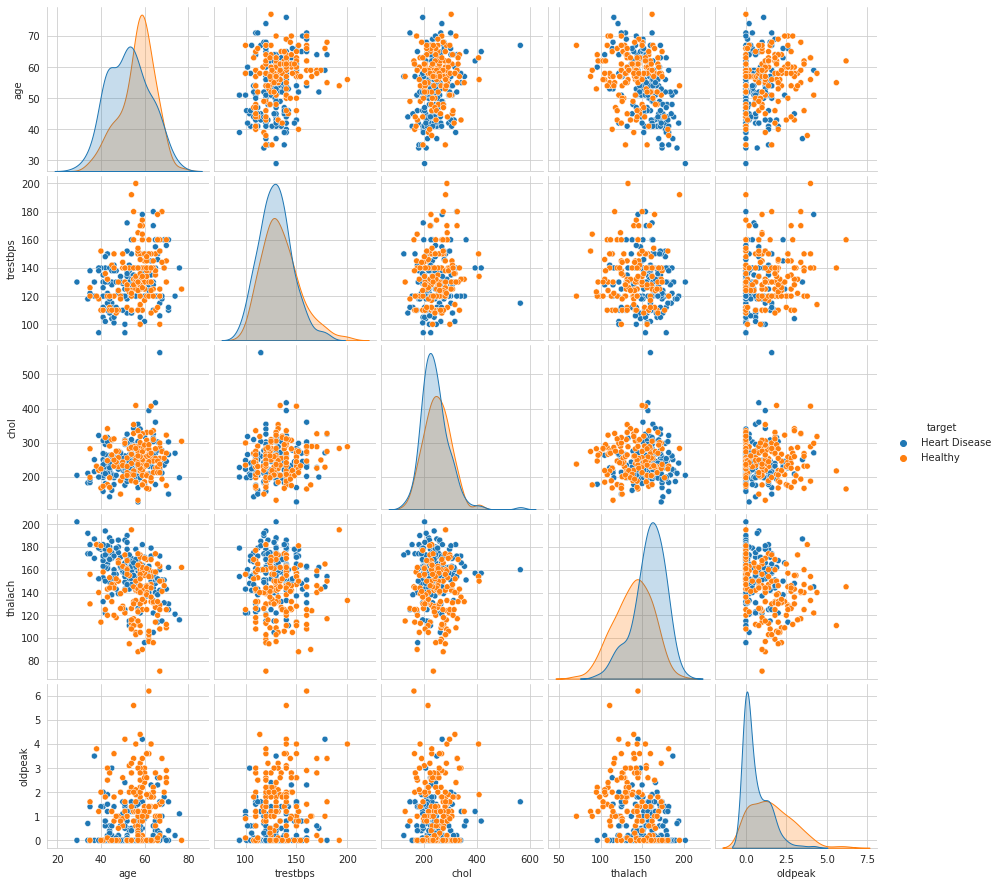

In [549]:
sns.pairplot(df[col + ['target']], hue = 'target')

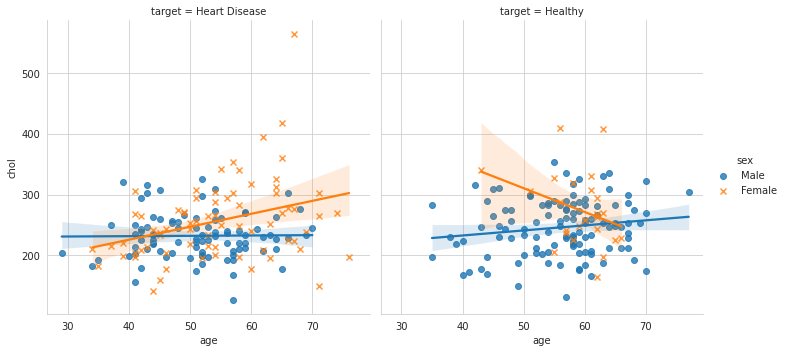

In [550]:
# to understand relationship between age and chol based on gender
sns.lmplot( x = 'age', y = 'chol', hue = 'sex', col = 'target', data = df, markers = ['o','x'])

In [551]:
#loading the data again, to get all numerical values
df = pd.read_excel('data.xlsx')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [552]:
df_num = df.select_dtypes(exclude= 'object')

In [553]:
import warnings
warnings.filterwarnings('ignore')

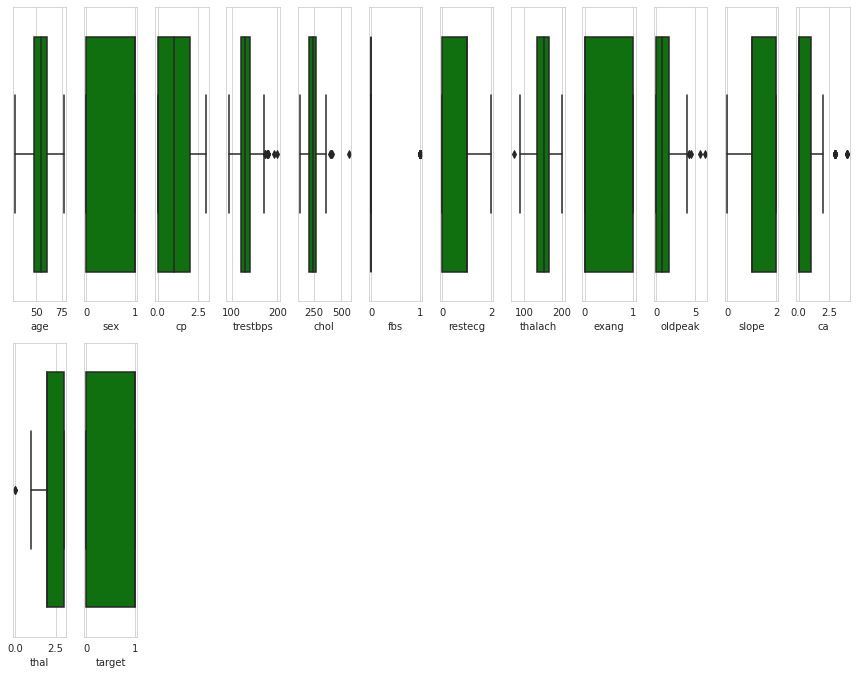

In [554]:
#to check outliers

l = df_num.columns.values

number_of_columns=12

number_of_rows = len(l)-1

plt.figure(figsize=(number_of_columns,5*number_of_rows))

for i in range(0,len(l)):

    plt.subplot(number_of_rows + 1,number_of_columns,i+1)

    sns.set_style('whitegrid')

    sns.boxplot(x=df[l[i]],color='green',orient='v')

    plt.tight_layout()

#3. Model for Machine learning

In [555]:
# Dependent and Independent Variable
X = df.drop(['target'],axis = 1)
y = df['target']


In [556]:
#Split the data for training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [557]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [558]:
X_train = sc.fit_transform(X_train)

In [559]:
X_test = sc.transform(X_test)

In [560]:
from sklearn. linear_model import LogisticRegression
log_reg = LogisticRegression()

In [561]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [562]:
y_pred = log_reg.predict(X_test)
y_pred #Predicted output

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [563]:
y_test # Actual output

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

In [564]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[32  9]
 [ 8 42]]


In [565]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8131868131868132


In [568]:
print('Accuracy of the model is 81.31%')

Accuracy of the model is 81.31%
